<a href="https://colab.research.google.com/github/brunoramosdev/JavaScript/blob/main/abc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final

In [100]:
import pandas as pd
import numpy as np
df_ = pd.read_csv('/content/Relação de Membros ABC 2025 Final.csv', sep=';')

In [101]:
df_ = df_.rename(columns={
    "SEXO (1-MASC ; 0-FEM)": "SEXO"
})

In [102]:
df_["SEXO"] = df_["SEXO"].map({1: "Homem", 0: "Mulher"})

In [103]:
print("PESSOAS QUE ESTÃO COM A DATA DE POSSE VAZIA")
df_[df_['DATA DE POSSE'].isna()]

PESSOAS QUE ESTÃO COM A DATA DE POSSE VAZIA


,NOME,SEXO,FALECIDO (1-SIM; 0-NÃO),PAIS NACIONALIDADE,DATA DE NASCIMENTO,CATEGORIA,ÁREA,DATA DE POSSE
122,Chen Ning Yang,Homem,0,Estados Unidos da América,1922-09-22 00:00:00.000,Correspondente,Ciências Físicas,NaN
481,Carlos Chagas Filho,Homem,1,Brasil,1910-09-12 00:00:00.000,Titular,Ciências Biológicas,NaN
549,Djairo Guedes de Figueiredo,Homem,0,Brasil,1934-04-02 00:00:00.000,Titular,Ciências Matemáticas,NaN
593,Elysiario Távora Filho,Homem,1,Brasil,1911-05-18 00:00:00.000,Titular,Ciências da Terra,NaN
841,Marcello Damy de Souza Santos,Homem,1,Brasil,1914-06-14 00:00:00.000,Titular,Ciências Físicas,NaN
892,Mario Ulysses Vianna Dias,Homem,1,Brasil,1914-04-26 00:00:00.000,Titular,Ciências Biomédicas,NaN


In [104]:
print("ELIMINANDO ESSAS PESSOAS QUE ESTÃO COM A DATA DE POSSE VAZIA")
df_ = df_.dropna(subset=['DATA DE POSSE'])
df_[df_['DATA DE POSSE'].isna()]

ELIMINANDO ESSAS PESSOAS QUE ESTÃO COM A DATA DE POSSE VAZIA


,NOME,SEXO,FALECIDO (1-SIM; 0-NÃO),PAIS NACIONALIDADE,DATA DE NASCIMENTO,CATEGORIA,ÁREA,DATA DE POSSE


In [105]:
df_['DATA DE POSSE'] = pd.to_datetime(df_['DATA DE POSSE'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
df_['DATA DE NASCIMENTO'] = pd.to_datetime(df_['DATA DE NASCIMENTO'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [106]:
df_.loc[:, 'ANO ELEICAO'] = df_['DATA DE POSSE'].dt.year

In [107]:
df_.loc[:, 'IDADE_INGRESSO'] = ((df_['DATA DE POSSE'] - df_['DATA DE NASCIMENTO']).dt.days / 365.25).astype(int)


## Tabela 1

In [108]:
pivot_df = df_.pivot_table(index='ÁREA',
                          columns=['CATEGORIA', 'SEXO'],
                          aggfunc='size',
                          fill_value=0)

total_homem = pivot_df.xs('Homem', level='SEXO', axis=1).sum(axis=1)
total_mulher = pivot_df.xs('Mulher', level='SEXO', axis=1).sum(axis=1)

pivot_df[('Total', 'Homem')] = total_homem
pivot_df[('Total', 'Mulher')] = total_mulher
pivot_df.loc['Total'] = pivot_df.sum()

print('TABELA 1')
print('')
pivot_df

TABELA 1



CATEGORIA                                Associado                       \
SEXO                                                              Homem   
ÁREA                                                                      
Ciências Agrárias                                                     0   
Ciências Biológicas                                                   6   
Ciências Biomédicas                                                  16   
Ciências Físicas                                                      9   
Ciências Matemáticas                                                  8   
Ciências Químicas                                                     6   
Ciências Sociais                                                      0   
Ciências da Engenharia                                                2   
Ciências da Saúde                                                     1   
Ciências da Terra                                                    11   
Sem Seção                                                             0   
Total                                                                59   

CATEGORIA                                        \
SEXO                                     Mulher   
ÁREA                                              
Ciências Agrárias                             0   
Ciências Biológicas                           4   
Ciências Biomédicas                           8   
Ciências Físicas                              1   
Ciências Matemáticas                          2   
Ciências Químicas                             2   
Ciências Sociais                              0   
Ciências da Engenharia                        0   
Ciências da Saúde                             0   
Ciências da Terra                             3   
Sem Seção                                     0   
Total                                        20   

CATEGORIA                                Colaborador                     \
SEXO                                                              Homem   
ÁREA                                                                      
Ciências Agrárias                                                     0   
Ciências Biológicas                                                   0   
Ciências Biomédicas                                                   0   
Ciências Físicas                                                      0   
Ciências Matemáticas                                                  0   
Ciências Químicas                                                     0   
Ciências Sociais                                                      0   
Ciências da Engenharia                                                0   
Ciências da Saúde                                                     0   
Ciências da Terra                                                     0   
Sem Seção                                                             5   
Total                                                                 5   

CATEGORIA                                Correspondente                  \
SEXO                                                              Homem   
ÁREA                                                                      
Ciências Agrárias                                                     5   
Ciências Biológicas                                                  65   
Ciências Biomédicas                                                  29   
Ciências Físicas                                                     36   
Ciências Matemáticas                                                 30   
Ciências Químicas                                                    39   
Ciências Sociais                                                      5   
Ciências da Engenharia                                               12   
Ciências da Saúde                                                     7   
Ciências da Terra                                                    31   
Sem Seç

In [109]:
s = df_.groupby(['ÁREA', 'CATEGORIA'])['SEXO'].value_counts(normalize=True)
s = s * 100
main_df = s.unstack(level=['CATEGORIA', 'SEXO'])

total_col = df_.groupby('ÁREA')['SEXO'].value_counts(normalize=True).mul(100)
total_col_df = total_col.unstack(level='SEXO')
total_col_df.columns = pd.MultiIndex.from_product([['Total'], total_col_df.columns])

total_row = df_.groupby('CATEGORIA')['SEXO'].value_counts(normalize=True).mul(100)

total_row_df = total_row.to_frame().T

grand_total = df_['SEXO'].value_counts(normalize=True).mul(100).to_frame().T
grand_total.columns = pd.MultiIndex.from_product([['Total'], grand_total.columns])

final_total_row = pd.concat([total_row_df, grand_total], axis=1)
final_total_row.index = ['Total'] # Nomeia a linha como "Total"

final_df = pd.concat([main_df, total_col_df], axis=1)

final_df = pd.concat([final_df, final_total_row])

categorias = df_['CATEGORIA'].unique().tolist()

final_df = final_df.reindex(columns=categorias + ['Total'], level=0)

print("% homem e mulher por categoria e área de especialização")
final_df.fillna(0).round(1)

% homem e mulher por categoria e área de especialização


Associado                       \
SEXO                                                              Homem   
Ciências Agrárias                                                   0.0   
Ciências Biológicas                                                60.0   
Ciências Biomédicas                                                66.7   
Ciências Físicas                                                   90.0   
Ciências Matemáticas                                               80.0   
Ciências Químicas                                                  75.0   
Ciências Sociais                                                    0.0   
Ciências da Engenharia                                            100.0   
Ciências da Saúde                                                 100.0   
Ciências da Terra                                                  78.6   
Sem Seção                                                           0.0   
Total                                                              74.7   

                                                 \
SEXO                                     Mulher   
Ciências Agrárias                           0.0   
Ciências Biológicas                        40.0   
Ciências Biomédicas                        33.3   
Ciências Físicas                           10.0   
Ciências Matemáticas                       20.0   
Ciências Químicas                          25.0   
Ciências Sociais                            0.0   
Ciências da Engenharia                      0.0   
Ciências da Saúde                           0.0   
Ciências da Terra                          21.4   
Sem Seção                                   0.0   
Total                                      25.3   

                                         Colaborador                     \
SEXO                                                              Homem   
Ciências Agrárias                                                   0.0   
Ciências Biológicas                                                 0.0   
Ciências Biomédicas                                                 0.0   
Ciências Físicas                                                    0.0   
Ciências Matemáticas                                                0.0   
Ciências Químicas                                                   0.0   
Ciências Sociais                                                    0.0   
Ciências da Engenharia                                              0.0   
Ciências da Saúde                                                   0.0   
Ciências da Terra                                                   0.0   
Sem Seção                                                         100.0   
Total                                                             100.0   

                                         Correspondente                  \
SEXO                                                              Homem   
Ciências Agrárias                                                  83.3   
Ciências Biológicas                                                94.2   
Ciências Biomédicas                                                90.6   
Ciências Físicas                                                   94.7   
Ciências Matemáticas                                              100.0   
Ciências Químicas                                                  95.1   
Ciências Sociais                                                  100.0   
Ciências da Engenharia                                            100.0   
Ciências da Saúde                                                  77.8   
Ciências da Terra                                                  96.9   
Sem Seção                                                           0.0   
Total                                                              94.5   

                                                 \
SEXO                                     Mulher   
Ciências Agrárias                          16.7   
Ciências Biológicas 

In [110]:
pivot_counts = df_.pivot_table(index='ÁREA',
                              columns=['CATEGORIA', 'SEXO'],
                              aggfunc='size',
                              fill_value=0)

percent_by_column = pivot_counts.div(pivot_counts.sum(axis=0), axis=1) * 100

counts_by_sex = df_.pivot_table(index='ÁREA', columns='SEXO', aggfunc='size', fill_value=0)

percent_total_by_sex = counts_by_sex.div(counts_by_sex.sum(axis=0), axis=1) * 100

percent_total_by_sex.columns = pd.MultiIndex.from_product([['Total'], percent_total_by_sex.columns])

final_df = pd.concat([percent_by_column, percent_total_by_sex], axis=1)

final_df.loc['Total'] = final_df.sum(axis=0)

categorias = pivot_counts.columns.get_level_values('CATEGORIA').unique().tolist()

final_df = final_df.reindex(columns=categorias + ['Total'], level=0)

print("% sobre o total na categoria, sexo e área de especialização ")

final_df.round(2)

% sobre o total na categoria, sexo e área de especialização 


Associado                       \
SEXO                                                              Homem   
ÁREA                                                                      
Ciências Agrárias                                                  0.00   
Ciências Biológicas                                               10.17   
Ciências Biomédicas                                               27.12   
Ciências Físicas                                                  15.25   
Ciências Matemáticas                                              13.56   
Ciências Químicas                                                 10.17   
Ciências Sociais                                                   0.00   
Ciências da Engenharia                                             3.39   
Ciências da Saúde                                                  1.69   
Ciências da Terra                                                 18.64   
Sem Seção                                                          0.00   
Total                                                            100.00   

                                                 \
SEXO                                     Mulher   
ÁREA                                              
Ciências Agrárias                           0.0   
Ciências Biológicas                        20.0   
Ciências Biomédicas                        40.0   
Ciências Físicas                            5.0   
Ciências Matemáticas                       10.0   
Ciências Químicas                          10.0   
Ciências Sociais                            0.0   
Ciências da Engenharia                      0.0   
Ciências da Saúde                           0.0   
Ciências da Terra                          15.0   
Sem Seção                                   0.0   
Total                                     100.0   

                                         Colaborador                     \
SEXO                                                              Homem   
ÁREA                                                                      
Ciências Agrárias                                                   0.0   
Ciências Biológicas                                                 0.0   
Ciências Biomédicas                                                 0.0   
Ciências Físicas                                                    0.0   
Ciências Matemáticas                                                0.0   
Ciências Químicas                                                   0.0   
Ciências Sociais                                                    0.0   
Ciências da Engenharia                                              0.0   
Ciências da Saúde                                                   0.0   
Ciências da Terra                                                   0.0   
Sem Seção                                                         100.0   
Total                                                             100.0   

                                         Correspondente                  \
SEXO                                                              Homem   
ÁREA                                                                      
Ciências Agrárias                                                  1.93   
Ciências Biológicas                                               25.10   
Ciências Biomédicas                                               11.20   
Ciências Físicas                                                  13.90   
Ciências Matemáticas                                              11.58   
Ciências Químicas                                                 15.06   
Ciências Sociais                                                   1.93   
Ciências da Engenharia                                             4.63   
Ciências da Saúde                                                  2.70   
Ciências da Terra                                                 11.97   
Sem Seção                                       

## Tabela 2

In [119]:
mask_mulheres = df_['SEXO'] == 'Mulher'
df_mulheres = df_[mask_mulheres].copy()

In [120]:
# Descobre ano mínimo e máximo do dataframe
ano_min = int(df_mulheres['ANO ELEICAO'].min())
ano_max = int(df_mulheres['ANO ELEICAO'].max())

bins = list(range(ano_min, ano_max, 5)) + [ano_max]

labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df_mulheres.loc[:, 'Período'] = pd.cut(
    df_mulheres['ANO ELEICAO'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# Monta a tabela cruzada
tabela_final = pd.crosstab(
    df_mulheres['CATEGORIA'],
    df_mulheres['Período'],
    rownames=['CATEGORIA'],
    colnames=['Período']
)

# Adiciona totais
tabela_final['Total'] = tabela_final.sum(axis=1)      # total por categoria
tabela_final.loc['Total'] = tabela_final.sum(axis=0)  # total por período

# Exibe
print("Entrada de Mulheres na Academia por Período (5 em 5 anos) e Tipo de vínculo (com Totais):\n")
tabela_final


Entrada de Mulheres na Academia por Período (5 em 5 anos) e Tipo de vínculo (com Totais):



Período,1951-1956,1956-1961,1961-1966,1966-1971,1971-1976,1976-1981,1981-1986,1986-1991,1991-1996,1996-2001,2001-2006,2006-2011,2011-2016,2016-2021,2021-2025,Total
CATEGORIA,,,,,,,,,,,,,,,,
Associado,3,0,2,1,3,1,1,1,3,5,0,0,0,0,0,20
Correspondente,1,0,0,0,1,0,0,1,1,2,3,0,2,0,4,15
Titular,1,1,0,1,1,3,1,3,6,12,13,19,22,30,34,147
Total,5,1,2,2,5,4,2,5,10,19,16,19,24,30,38,182


In [117]:
mask_homens = df_['SEXO'] == 'Homem'
df_homens = df_[mask_homens].copy()

In [118]:
# Descobre ano mínimo e máximo do dataframe
ano_min = int(df_homens['ANO ELEICAO'].min())
ano_max = int(df_homens['ANO ELEICAO'].max())

bins = list(range(ano_min, ano_max, 5)) + [ano_max]

labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

df_homens.loc[:, 'Período'] = pd.cut(
    df_homens['ANO ELEICAO'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

# Monta a tabela cruzada
tabela_final = pd.crosstab(
    df_homens['CATEGORIA'],
    df_homens['Período'],
    rownames=['CATEGORIA'],
    colnames=['Período']
)

# Adiciona totais
tabela_final['Total'] = tabela_final.sum(axis=1)      # total por categoria
tabela_final.loc['Total'] = tabela_final.sum(axis=0)  # total por período

# Exibe
print("Entrada de Homens na Academia por Período (5 em 5 anos) e Tipo de vínculo (com Totais):\n")
tabela_final


Entrada de Homens na Academia por Período (5 em 5 anos) e Tipo de vínculo (com Totais):



Período,1934-1939,1944-1949,1949-1954,1954-1959,1959-1964,1964-1969,1969-1974,1974-1979,1979-1984,1984-1989,1989-1994,1994-1999,1999-2004,2004-2009,2009-2014,2014-2019,2019-2024,2024-2025,Total
CATEGORIA,,,,,,,,,,,,,,,,,,,
Associado,0,0,1,2,7,4,8,8,6,5,5,13,0,0,0,0,0,0,59
Colaborador,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,2,0,5
Correspondente,0,0,0,0,8,1,14,17,26,10,13,39,29,20,37,25,15,5,259
Titular,1,3,13,7,21,8,28,26,24,22,42,74,95,70,93,66,36,10,639
Total,1,3,14,9,36,13,50,51,57,37,60,127,124,90,131,91,53,15,962


## Tabela 3

In [128]:
df_mulheres.loc[:, 'IDADE_INGRESSO'] = pd.to_numeric(df_mulheres['IDADE_INGRESSO'], errors='coerce')

# Cria faixas de 5 em 5 anos (exemplo: 10-14, 15-19, ..., 95-99)
faixas_etarias = list(range(10, 101, 5))  # de 10 até 100, de 5 em 5
nomes_faixas = [f"{i}-{i+4}" for i in faixas_etarias[:-1]]

# Cria coluna de faixa etária
df_mulheres.loc[:, 'Faixa Etária'] = pd.cut(
    df_mulheres['IDADE_INGRESSO'],
    bins=faixas_etarias,
    labels=nomes_faixas,
    right=False,      # inclui o limite inferior, exclui o superior
    include_lowest=True
)

# Tabela cruzada
tabela_final = pd.crosstab(
    df_mulheres['CATEGORIA'],
    df_mulheres['Faixa Etária'],
    rownames=['CATEGORIA'],
    colnames=['Faixa Etária']
)
tabela_final.loc['Total'] = tabela_final.sum(axis=0)
print("Número de mulheres, faixa etária e categoria na data de ingresso")
tabela_final


Número de mulheres, faixa etária e categoria na data de ingresso


Faixa Etária,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94
CATEGORIA,,,,,,,,,,,,,,
Associado,1,3,2,6,2,1,2,2,0,1,0,0,0,0
Correspondente,0,0,1,0,1,1,3,3,4,2,0,0,0,0
Titular,0,2,3,5,13,26,33,31,21,5,3,1,3,1
Total,1,5,6,11,16,28,38,36,25,8,3,1,3,1


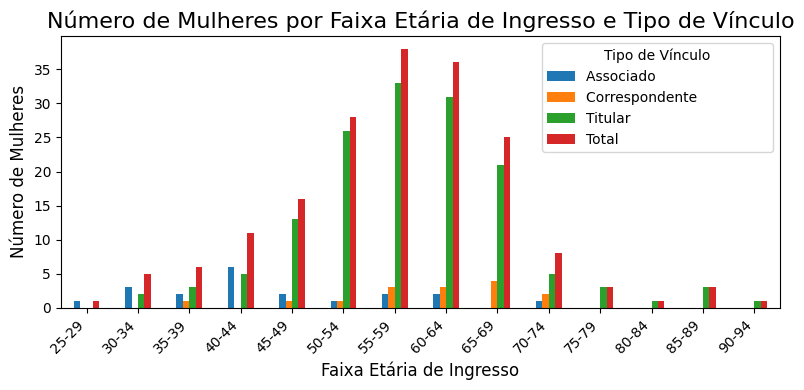

In [129]:
import matplotlib.pyplot as plt

# Create a grouped bar chart
tabela_final.T.plot(kind='bar', figsize=(8, 4))

# Add titles and labels
plt.title('Número de Mulheres por Faixa Etária de Ingresso e Tipo de Vínculo', fontsize=16)
plt.xlabel('Faixa Etária de Ingresso', fontsize=12)
plt.ylabel('Número de Mulheres', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Vínculo')
plt.tight_layout()

# Save the plot to a file
plt.savefig('grafico_faixas_etarias.png')

In [124]:
df_homens.loc[:, 'IDADE_INGRESSO'] = pd.to_numeric(df_homens['IDADE_INGRESSO'], errors='coerce')

# Cria faixas de 5 em 5 anos (exemplo: 10-14, 15-19, ..., 95-99)
faixas_etarias = list(range(10, 101, 5))  # de 10 até 100, de 5 em 5
nomes_faixas = [f"{i}-{i+4}" for i in faixas_etarias[:-1]]

# Cria coluna de faixa etária
df_homens.loc[:, 'Faixa Etária'] = pd.cut(
    df_homens['IDADE_INGRESSO'],
    bins=faixas_etarias,
    labels=nomes_faixas,
    right=False,      # inclui o limite inferior, exclui o superior
    include_lowest=True
)

# Tabela cruzada
tabela_final = pd.crosstab(
    df_homens['CATEGORIA'],
    df_homens['Faixa Etária'],
    rownames=['CATEGORIA'],
    colnames=['Faixa Etária']
)
tabela_final.loc['Total'] = tabela_final.sum(axis=0)
print("Número de homens, faixa etária e categoria na data de ingresso")
tabela_final


Número de homens, faixa etária e categoria na data de ingresso


Faixa Etária,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94
CATEGORIA,,,,,,,,,,,,,,
Associado,4,6,10,16,11,6,4,1,1,0,0,0,0,0
Colaborador,0,0,0,0,0,1,0,2,0,1,0,1,0,0
Correspondente,1,2,4,24,17,35,46,43,39,22,16,6,2,1
Titular,12,34,57,59,90,115,94,78,59,29,8,3,1,0
Total,17,42,71,99,118,157,144,124,99,52,24,10,3,1


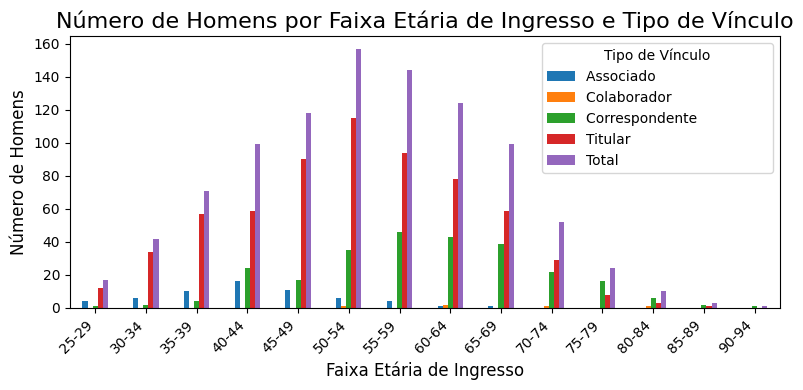

In [127]:
import matplotlib.pyplot as plt

# Create a grouped bar chart
tabela_final.T.plot(kind='bar', figsize=(8, 4))

# Add titles and labels
plt.title('Número de Homens por Faixa Etária de Ingresso e Tipo de Vínculo', fontsize=16)
plt.xlabel('Faixa Etária de Ingresso', fontsize=12)
plt.ylabel('Número de Homens', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Vínculo')
plt.tight_layout()

# Save the plot to a file
plt.savefig('grafico_faixas_etarias.png')